# Normalização

Normalizar dado categorico não faz diferença, então pode normalizar...<br>
https://stats.stackexchange.com/questions/399430/does-categorical-variable-need-normalization-standardization

-----------------------------

In [1]:
## IMPORTS
%matplotlib inline

import easygui
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import scipy.stats as st

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

warnings.filterwarnings('ignore') 

---------------------------

In [2]:
## Load dataset
dataframe = pd.read_csv("abalone.csv")

Gerar dataset com colunas seguindo distribuição normal...<br>
ferramenta: https://www.socscistatistics.com/utilities/normaldistribution/default.aspx

In [3]:
# Verificação de tipos e nulos
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


------------------------------------

In [4]:
categorical_columns = []
le = preprocessing.LabelEncoder()

for col in dataframe.columns:
    if dataframe[col].dtypes == 'object':
        categorical_columns.append(col)
        le.fit(dataframe[col])
        dataframe[col] = le.transform(dataframe[col])

In [5]:
dataframe.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
z_score = st.zscore(dataframe)
dataframe_norm = pd.DataFrame(z_score,columns = dataframe.columns)

In [7]:
dataframe_norm

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1.151980,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,1.151980,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,-1.280690,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,1.151980,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-0.064355,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013
...,...,...,...,...,...,...,...,...,...
4172,-1.280690,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,0.330765
4173,1.151980,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,0.020571
4174,1.151980,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,-0.289624
4175,-1.280690,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,0.020571


In [8]:
# Iremos trabalhar com as colunas de dados que apresentarem os tipos int64 e float64
# Demais tipos de dados ficarão para trabalhos futuros
dataset = dataframe
for col in dataset.columns:
    if dataset[col].dtypes == 'float64' or dataset[col].dtypes == 'int64' :
        print("Column {} userfull".format(col))
    else:
        print("Column {} is not userfull".format(col))
        dataset = dataset.drop( columns = [col])

Column Sex userfull
Column Length userfull
Column Diameter userfull
Column Height userfull
Column Whole weight userfull
Column Shucked weight userfull
Column Viscera weight userfull
Column Shell weight userfull
Column Rings userfull


---------------------------------

### Divisão treino e teste

In [9]:
df_columns = list(dataset.columns)

In [10]:
Y_choiced = easygui.buttonbox("Qual coluna será seu Y ? Dica: Em alguns dataset's a coluna rotulada é a última muitas vezes.",title = "Escolher-Y", choices = df_columns )
easygui.msgbox ("Você escolheu coluna: " + Y_choiced)

'OK'

In [11]:
dataset = dataset.drop(columns = [Y_choiced])
label = dataframe[[Y_choiced]]

-------------------------

In [12]:
 X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.5)

In [13]:
X_test, X_validate, y_test, y_validate = train_test_split(X_test, y_test, test_size=0.5)

In [14]:
train_set = X_train

In [15]:
y_train.columns[0]

'Rings'

In [16]:
train_set[y_train.columns[0]] = y_train

In [17]:
train_set

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
554,1,0.485,0.390,0.125,0.5910,0.2870,0.1410,0.1200,9
1007,2,0.610,0.470,0.150,1.1625,0.5650,0.2580,0.3085,11
2972,2,0.720,0.580,0.190,2.0885,0.9955,0.4780,0.5305,13
726,2,0.400,0.305,0.085,0.2970,0.1080,0.0705,0.1000,10
3099,2,0.575,0.480,0.150,0.9465,0.4355,0.2605,0.2505,9
...,...,...,...,...,...,...,...,...,...
2109,2,0.620,0.490,0.170,1.2105,0.5185,0.2555,0.3350,13
3755,1,0.510,0.395,0.105,0.5525,0.2340,0.1270,0.1650,8
936,1,0.450,0.335,0.105,0.4470,0.2335,0.1530,0.1190,7
3720,0,0.380,0.320,0.115,0.6475,0.3230,0.1325,0.1640,7


-------------------------------------------------------------

### Normalização

https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/

In [12]:
scaler = MinMaxScaler()

In [13]:
x_columns = list(dataset.columns)
dataset[x_columns] = scaler.fit_transform(dataset[x_columns])

In [14]:
dataset.head(20)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982
1,1.0,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261
2,0.0,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773
3,1.0,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965
4,0.5,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313
5,0.5,0.472973,0.411765,0.084071,0.123783,0.094149,0.101382,0.118087
6,0.0,0.614865,0.605042,0.132743,0.274659,0.158709,0.185648,0.327354
7,0.0,0.635135,0.621849,0.110619,0.271294,0.197041,0.196182,0.257598
8,1.0,0.540541,0.529412,0.110619,0.179741,0.144923,0.147465,0.162930
9,0.0,0.641892,0.647059,0.132743,0.316097,0.210827,0.198157,0.317389


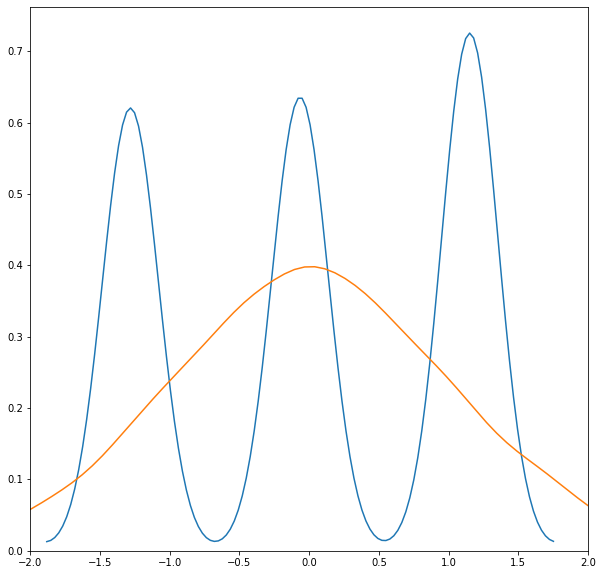

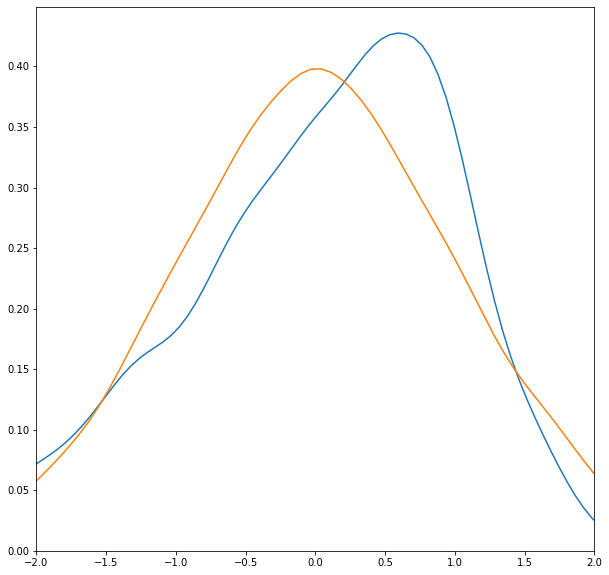

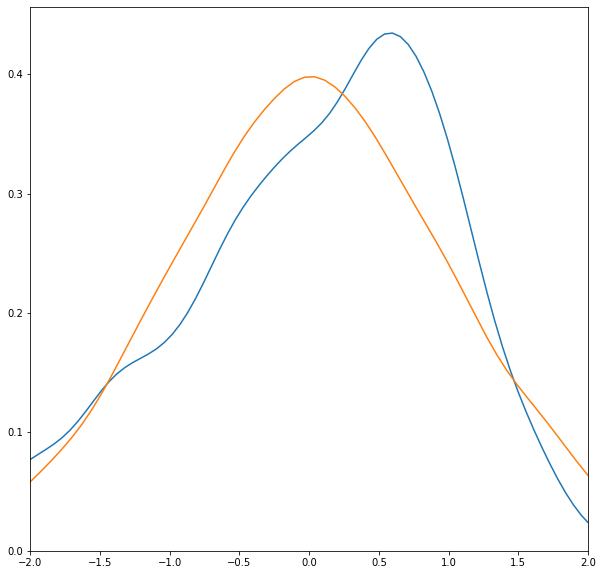

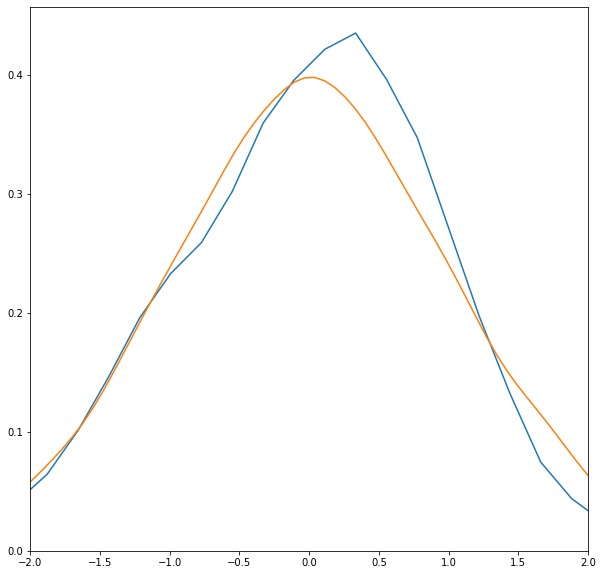

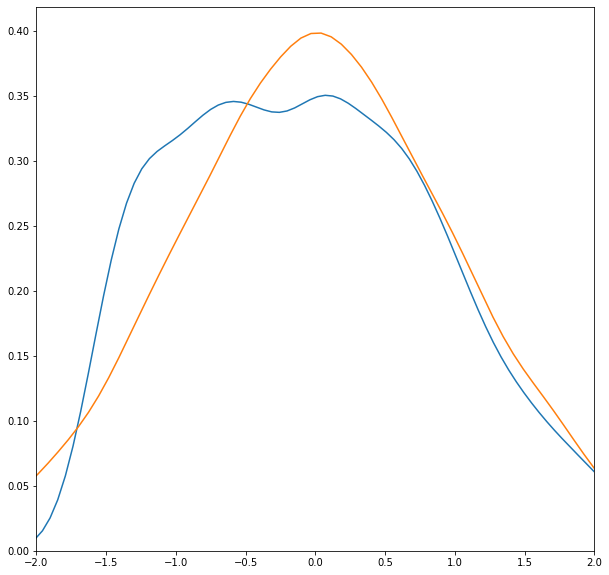

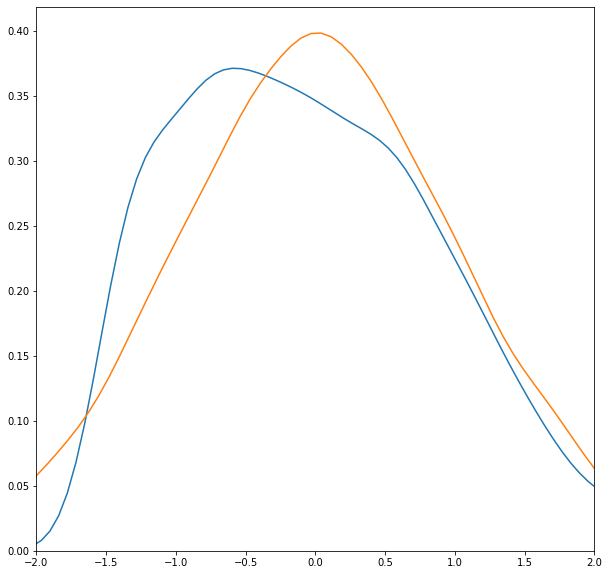

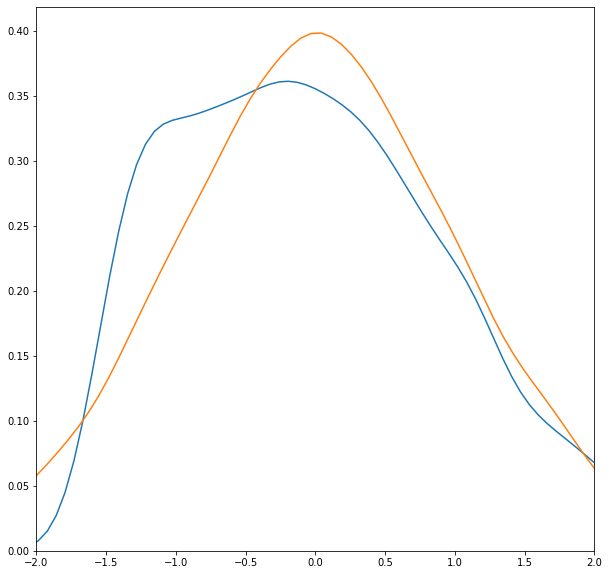

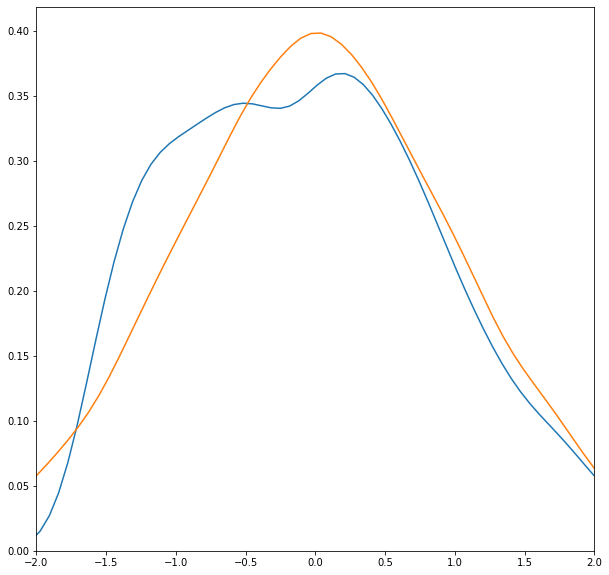

In [18]:
s = np.random.normal(loc=0, scale=1, size = len(dataset))

for col in dataset.columns:
    if dataset[col].dtypes =='float64':
        fig, ax =plt.subplots(1,1, figsize=(10,10) )
        sns.kdeplot(dataframe_norm[col].values, ax=ax)
        sns.kdeplot(s , ax=ax)
        plt.xlim(-2, 2)
        fig.show()

----------------------------------------------------